# Training a Simple Neural Net Classifier

## Model Set-Up

In [1]:
#Code Builds off on top of Maren's code to get desired outputs
import random
from random import randint
from math import exp
import numpy as np
import copy

# import packages for heatmap associated generation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sys
import os

# For pretty-printing the arrays
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) 

In [2]:
# Compute neuron activation using sigmoid transfer function
def computeTransferFnctn(summedNeuronInput, alpha):
    activation = 1.0 / (1.0 + exp(-alpha*summedNeuronInput)) 
    return activation

# Compute derivative of transfer function
def computeTransferFnctnDeriv(NeuronOutput, alpha):
    return alpha*NeuronOutput*(1.0 -NeuronOutput)    

# Compute dot product between matrices
def matrixDotProduct (matrx1,matrx2):
    dotProduct = np.dot(matrx1,matrx2)
    
    return(dotProduct)  

In [3]:
def obtainNeuralNetworkSizeSpecs ():
# This list will be used to specify the sizes of two different weight arrays:
#   - wWeights; the Input-to-Hidden array, and
#   - vWeights; the Hidden-to-Output array.   

    numInputNodes = 81
    numHiddenNodes = 6
    numOutputNodes = 9   
    print()
    print("  The number of nodes at each level are:")
    print("    Input: 9x9 (square array)")
    print("    Hidden: ", numHiddenNodes)
    print("    Output: ", numOutputNodes)
            
# We create a list containing the crucial SIZES for the connection weight arrays                
    arraySizeList = (numInputNodes, numHiddenNodes, numOutputNodes)
    
# We return this list to the calling procedure, 'main'.       
    return (arraySizeList)  

In [4]:
# Function to intiialize connect weights with randomly generated number
def InitializeWeight ():

    randomNum = random.random()
    weight=1-2*randomNum
           
    return (weight)  


#Function to initialize the node-to-node connection weight arrays
def initializeWeightArray (weightArraySizeList):    
    numLowerNodes = weightArraySizeList[0] 
    numUpperNodes = weightArraySizeList[1] 
# Initialize the weight variables with random weights    
    weightArray = np.zeros((numUpperNodes,numLowerNodes))    # iniitalize the weight matrix with 0's
    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        for col in range(numLowerNodes):  # number of columns in matrix 2
            weightArray[row,col] = InitializeWeight ()
     
    return (weightArray)  


# Function to initialize the bias weight arrays
def initializeBiasWeightArray (numBiasNodes):
# Initialize the bias weight variables with random weights    
    biasWeightArray = np.zeros(numBiasNodes)    # iniitalize the weight matrix with 0's
    for node in range(numBiasNodes):  #  Number of nodes in bias weight set
        biasWeightArray[node] = InitializeWeight ()
  
    return (biasWeightArray)  

## Training Data Set-Up

In [5]:
def obtainSelectedAlphabetTrainingValues (dataSet, printTheLetter, noise):

    # The training data list will have the  values for the X-OR problem:
    #     1st value - sequence id
    #     2nd value - pixels for letter
    #     3rd value - letter number
    #     4th value - letter
    #     5th value - letter class (alpha)
    #     6th value - letter class (numeric)
    
    trainingDataList = [ ( 1,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],1,'A',0,'A'), # training data list 1 selected for the letter 'A'
                         ( 2,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],2,'B',1,'B'), # training data list 2, letter 'E', courtesy AJM
                         ( 3,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],3,'C',2,'C'), # training data list 3, letter 'C', courtesy PKVR
                         ( 4,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],4,'D',3,'O'), # training data list 4, letter 'D', courtesy TD
                         ( 5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],5,'E',4,'E'), # training data list 5, letter 'E', courtesy BMcD 
                         ( 6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],6,'F',4,'E'), # training data list 6, letter 'F', courtesy SK
                         ( 7,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],7,'G',1,'C'),
                         ( 8,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],8,'H',0,'A'), # training data list 8, letter 'H', courtesy JC
                         ( 9,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],9,'I',5,'I'), # training data list 9, letter 'I', courtesy GR
                         (10,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],10,'J',5,'I'), # training data list 10 selected for the letter 'L', courtesy JT
                         (11,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],11,'K',6,'K'), # training data list 11 selected for the letter 'K', courtesy EO      
                         (12,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],12,'L',7,'L'), # training data list 12 selected for the letter 'L', courtesy PV
                         (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,1,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],13,'M',8,'M'), # training data list 13 selected for the letter 'M', courtesy GR            
                         (14,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],14,'N',8,'M'), # training data list 14 selected for the letter 'N'
                         (15,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],15,'O',3,'O'), # training data list 15, letter 'O', courtesy TD
                         (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],16,'P',1,'B'), # training data list 16, letter 'P', courtesy MT
                         (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],17,'Q',3,'O'), # training data list 17, letter 'Q', courtesy AJM (square corners)
                         (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],18,'R',1,'B'), # training data list 18, letter 'R', courtesy AJM (variant on 'P') 
                         (19,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],19,'S',5,'E'), # training data list 19, letter 'S', courtesy RG (square corners)
                         (20,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],20,'T',6,'I'), # training data list 20, letter 'T', courtesy JR
                         (21,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],21,'U',8,'L'), # training data list 21, letter 'U', courtesy JD
                         (22,[0,1,1,0,0,0,1,1,0, 0,1,1,0,0,0,1,1,0, 0,1,1,0,0,0,1,1,0, 0,1,1,0,0,0,1,1,0, 0,0,1,1,0,1,1,0,0, 0,0,1,1,0,1,1,0,0, 0,0,1,1,0,1,1,0,0, 0,0,0,1,1,1,0,0,0, 0,0,0,1,1,1,0,0,0],22,'V',8,'V'), # training data list 22, letter 'V', courtesy JD
                         (23,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,1,0,0,0,1,0,1, 0,1,0,0,0,0,0,1,0],23,'W',8,'V'), # training data list 23, letter 'W', courtesy KW
                         (24,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],24,'X',6,'K'), # training data list 24, letter 'X', courtesy JD
                         (25,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],25,'Y',6,'K'),
                         (26,[1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,1,0,0, 0,0,0,0,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,0,0,0,0, 0,0,1,0,0,0,0,0,0, 0,1,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],26,'Z',5,'I') # training data list 26, letter 'Z', courtesy ZW
    ]
    
    #
    # if noise == 0 then just return training dataset
    # else change the percent of pixels indicated in the 'noise'
    if (noise == 0):
        if (printTheLetter == True):
            printLetter(trainingDataList[dataSet])
        return (trainingDataList[dataSet])
    # noise to be added, so determine a set of random pixels to change and return
    else:
        trainingDataListWithNoise = trainingDataList[dataSet]
        numberOfPixels = len(trainingDataListWithNoise[1])
        numberToChange = round(numberOfPixels * noise)
        whichToChange = random.sample(range(0, numberOfPixels), numberToChange)
        for indx in range(len(whichToChange)):
            if (trainingDataListWithNoise[1][whichToChange[indx]] == 0):
                trainingDataListWithNoise[1][whichToChange[indx]] = 1
            else:
                trainingDataListWithNoise[1][whichToChange[indx]] = 0
        if (printTheLetter == True):
            printLetter(trainingDataListWithNoise)
        
        return (trainingDataListWithNoise)

In [6]:
#Function to initialize a specific connection weight with a randomly-generate num between 0 & 1
def obtainRandomAlphabetTrainingValues (numTrainingDataSets):

    # The training data list will have the  values for the X-OR problem:
    #   - First 81 valuea will be the 9x9 pixel-grid representation of the letter
    #       represented as a 1-D array (0 or 1 for each)
    #   - 82nd value will be the output class (0 .. totalClasses - 1)
    #   - 83rd value will be the string associated with that class, e.g., 'X'
    # We are starting with five letters in the training set: X, M, N, H, and A
    # Thus there are five choices for training data, which we'll select on random basis
      
    dataSet = random.randint(0, numTrainingDataSets - 1)
# ({dataset}Note: Nine possible output classes: 0 .. 8 trainingDataListXX [4]    
    trainingDataList = [ ( 1,[0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],1,'A',0,'A'), # training data list 1 selected for the letter 'A'
                         ( 2,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,0, 1,1,1,1,1,1,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,0],2,'B',1,'B'), # training data list 2, letter 'E', courtesy AJM
                         ( 3,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],3,'C',2,'C'), # training data list 3, letter 'C', courtesy PKVR
                         ( 4,[1,1,1,1,1,1,1,1,0, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,0],4,'D',3,'O'), # training data list 4, letter 'D', courtesy TD
                         ( 5,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],5,'E',4,'E'), # training data list 5, letter 'E', courtesy BMcD 
                         ( 6,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],6,'F',4,'E'), # training data list 6, letter 'F', courtesy SK
                         ( 7,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],7,'G',1,'C'),
                         ( 8,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1],8,'H',0,'A'), # training data list 8, letter 'H', courtesy JC
                         ( 9,[0,0,1,1,1,1,1,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,1,1,1,1,1,0,0],9,'I',5,'I'), # training data list 9, letter 'I', courtesy GR
                         (10,[0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,1,1,0,0,0],10,'J',5,'I'), # training data list 10 selected for the letter 'L', courtesy JT
                         (11,[1,0,0,0,0,0,1,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,1,1,0,0,0,0,0,0, 1,0,0,1,0,0,0,0,0, 1,0,0,0,1,0,0,0,0, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0],11,'K',6,'K'), # training data list 11 selected for the letter 'K', courtesy EO      
                         (12,[1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],12,'L',7,'L'), # training data list 12 selected for the letter 'L', courtesy PV
                         (13,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,0,1,0,0,0,1,0,1, 1,0,1,0,0,0,1,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,1,0,0,0,1],13,'M',8,'M'), # training data list 13 selected for the letter 'M', courtesy GR            
                         (14,[1,0,0,0,0,0,0,0,1, 1,1,0,0,0,0,0,0,1, 1,0,1,0,0,0,0,0,1, 1,0,0,1,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1],14,'N',8,'M'), # training data list 14 selected for the letter 'N'
                         (15,[0,1,1,1,1,1,1,1,0, 1,1,0,0,0,0,0,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,1,1,1,1,1,1,0],15,'O',3,'O'), # training data list 15, letter 'O', courtesy TD
                         (16,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0],16,'P',1,'B'), # training data list 16, letter 'P', courtesy MT
                         (17,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,1,0,0,1, 1,0,0,0,0,0,1,0,1, 1,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1],17,'Q',3,'O'), # training data list 17, letter 'Q', courtesy AJM (square corners)
                         (18,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1, 1,0,0,0,0,1,0,0,0, 1,0,0,0,0,0,1,0,0, 1,0,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],18,'R',1,'B'), # training data list 18, letter 'R', courtesy AJM (variant on 'P') 
                         (19,[1,1,1,1,1,1,1,1,1, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 0,0,0,0,0,0,0,0,1, 1,1,1,1,1,1,1,1,1],19,'S',5,'E'), # training data list 19, letter 'S', courtesy RG (square corners)
                         (20,[0,1,1,1,1,1,1,1,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],20,'T',6,'I'), # training data list 20, letter 'T', courtesy JR
                         (21,[1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 1,1,0,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],21,'U',8,'L'), # training data list 21, letter 'U', courtesy JD
                         (22,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,1,0,0,0,1,0,0, 0,0,1,0,0,0,0,1,1, 0,1,1,0,0,0,1,1,0, 0,0,1,1,1,1,1,0,0],22,'V',8,'V'), # training data list 22, letter 'V', courtesy JD
                         (23,[1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0,1, 1,0,0,0,1,0,0,0,1, 1,0,0,1,0,1,0,0,1, 1,0,1,0,0,0,1,0,1, 0,1,0,0,0,0,0,1,0],23,'W',8,'V'), # training data list 23, letter 'W', courtesy KW
                         (24,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,1,0,0,0, 0,0,1,0,0,0,1,0,0, 0,1,0,0,0,0,0,1,0, 1,0,0,0,0,0,0,0,1],24,'X',6,'K'), # training data list 24, letter 'X', courtesy JD
                         (25,[1,0,0,0,0,0,0,0,1, 0,1,0,0,0,0,0,1,0, 0,0,1,0,0,0,1,0,0, 0,0,0,1,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,0,1,0,0,0,0],25,'Y',6,'K'),
                         (26,[1,1,1,1,1,1,1,1,1, 0,0,0,0,0,0,0,1,0, 0,0,0,0,0,0,1,0,0, 0,0,0,0,0,1,0,0,0, 0,0,0,0,1,0,0,0,0, 0,0,0,1,0,0,0,0,0, 0,0,1,0,0,0,0,0,0, 0,1,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1],26,'Z',5,'I') # training data list 26, letter 'Z', courtesy ZW
    ]
    
    return (trainingDataList[dataSet])      

## Single Feed-Forward Pass

In [7]:
# Initialize specific connection weight with a random num between 0 & 1
def ComputeSingleFeedforwardPassFirstStep (alpha, inputDataList, wWeightArray, biasHiddenWeightArray):
    sumIntoHiddenArray = np.zeros(hiddenArrayLength)    
    hiddenArray = np.zeros(hiddenArrayLength)   

    sumIntoHiddenArray = matrixDotProduct (wWeightArray,inputDataList)
    
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        hiddenNodeSumInput=sumIntoHiddenArray[node]+biasHiddenWeightArray[node]
        hiddenArray[node] = computeTransferFnctn(hiddenNodeSumInput, alpha)
                                                                                                    
    return (hiddenArray);


# Compute output node activations, give hidden node activations, the hidden-to-output connection weights, and the output bias weights
# Returns array of output node activations
def ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray):
    sumIntoOutputArray = np.zeros(hiddenArrayLength)    
    outputArray = np.zeros(outputArrayLength)   

    sumIntoOutputArray = matrixDotProduct (vWeightArray,hiddenArray)
    
    for node in range(outputArrayLength):  #  Number of hidden nodes
        outputNodeSumInput=sumIntoOutputArray[node]+biasOutputWeightArray[node]
        outputArray[node] = computeTransferFnctn(outputNodeSumInput, alpha)
                                                                                                   
    return (outputArray);


# Compute output node activations and determine errors across training set
def ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray, noise):

    selectedTrainingDataSet = 1                              

    hiddenNodeActivationsList = []
    outputNodeActivationsList = []

    # while selectedTrainingDataSet < numTrainingDataSets + 1: 
    for selectedTrainingDataSet in range(numTrainingDataSets):
        print()
        print(" the selected Training Data Set is ", selectedTrainingDataSet)
        printTheLetter = True # print desired letter?
        trainingDataList = obtainSelectedAlphabetTrainingValues (selectedTrainingDataSet, printTheLetter, noise)

        trainingDataInputList = trainingDataList[1]      
        
        inputDataList = [] 
        for node in range(inputArrayLength): 
            trainingData = trainingDataInputList[node]  
            inputDataList.append(trainingData)

        letterNum = trainingDataList[2]
        letterChar = trainingDataList[3]  
        print()
        print("  Data Set Number", selectedTrainingDataSet, " for letter ", letterChar, " with letter number ", letterNum) 

        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataList, wWeightArray, biasHiddenWeightArray)

        print()
        print(" The hidden node activations are: ")
        print(hiddenArray)

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray)
    
        print()
        print(" The output node activations are: ")
        print(outputArray) 

        hiddenNodeActivationsList.append([letterChar, letterNum, trainingDataList[4], '\n'.join([letterChar, trainingDataList[5]]), hiddenArray])
        outputNodeActivationsList.append([letterChar, letterNum, trainingDataList[4], '\n'.join([letterChar, trainingDataList[5]]), outputArray])
 
        desiredOutputArray = np.zeros(outputArrayLength)    # iniitalize the output array with 0's
        desiredClass = trainingDataList[4]                  # identify the desired class
        desiredOutputArray[desiredClass] = 1                # set the desired output for that class to 1
     
        print()
        print(" The desired output array values are: ")
        print(desiredOutputArray)  
       
                        
        # Determine the error between actual and desired outputs
        # Initialize the error array
        errorArray = np.zeros(outputArrayLength) 
    
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

        print()
        print(" ' The error values are:")
        print(errorArray)   
        
        # Print the Summed Squared Error  
        print("New SSE = %.6f" % newSSE) 
         
        selectedTrainingDataSet = selectedTrainingDataSet + 1 
    
    print("\n\nhiddenNodeActivationsList L-{letter} C-{class}")
    print("==============================================")
    print("==============================================\n")
    df = pd.DataFrame([lst[4] for lst in hiddenNodeActivationsList])
    df = df.transpose()
    df.columns = (x[3] for x in hiddenNodeActivationsList)
    df.columns = 'L-' + df.columns.str[0:1] + ' C-' + df.columns.str[2:3]
    print(df)
    
    # hidden nodes heatmap
    print("\n\n\n\n\n")
    fig, ax = plt.subplots()
    sns.set(rc={'figure.figsize':(10.0,4.0)})
    ax = sns.heatmap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax.set_title('Hidden Node Activations\nL-{letter} C-{class}')
    ax.set_ylabel('Node')
    ax.set_xlabel('L-{Letter} C-{Class}')
    plt.show()
    
    # hidden nodes clustermap with row and column dendrogram
    print("\n\n\n\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax.fig.suptitle('Hidden Node Activations\nClustered by Node and Letter\nL-{letter} C-{class}')
    plt.show()

    # hidden nodes clustermap with column dendrogram
    print("\n\n\n\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white',row_cluster=False)
    ax.fig.suptitle('Hidden Node Activations\nClustered Letter\nL-{letter} C-{class}')
    plt.show()

## Backpropagation

In [8]:
# Backpropagate weight changes onto the hidden-to-output connection weights
def backpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray):
# Unpack array lengths
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]

    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 
                        
    deltaVWtArray = np.zeros((outputArrayLength, hiddenArrayLength))  # initialize an array for the deltas
    newVWeightArray = np.zeros((outputArrayLength, hiddenArrayLength)) # initialize an array for the new hidden weights
        
    for row in range(outputArrayLength):
        for col in range(hiddenArrayLength):  # number of columns in weightMatrix
            partialSSE_w_V_Wt = -errorArray[row]*transferFuncDerivArray[row]*hiddenArray[col]
            deltaVWtArray[row,col] = -eta*partialSSE_w_V_Wt
            newVWeightArray[row,col] = vWeightArray[row,col] + deltaVWtArray[row,col]                                                                                       
                                                                                                                                                                                                                                                                         
    return (newVWeightArray);     

In [9]:
# Backpropagate weight changes onto the bias-to-output connection weights
def backpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray):
# Unpack the output array length
    outputArrayLength = arraySizeList [2]

    deltaBiasOutputArray = np.zeros(outputArrayLength)  # initialize an array for the deltas
    newBiasOutputWeightArray = np.zeros(outputArrayLength) # initialize an array for the new output bias weights
    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 

    for node in range(outputArrayLength):  #  Number of nodes in output array (same as number of output bias nodes)    
        partialSSE_w_BiasOutput = -errorArray[node]*transferFuncDerivArray[node]
        deltaBiasOutputArray[node] = -eta*partialSSE_w_BiasOutput  
        newBiasOutputWeightArray[node] =  biasOutputWeightArray[node] + deltaBiasOutputArray[node]           
                                                                                                                                                
    return (newBiasOutputWeightArray);   

In [10]:
# Backpropagate weight changes onto the input-to-hidden connection weights

def backpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):
# Unpack array lengths
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]              
  
    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)    # initialize an array for the transfer function deriv 
      
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)
        
    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array
      
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha)
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]
        
    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = weightedErrorArray[hiddenNode] \
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode]
             
    deltaWWtArray = np.zeros((hiddenArrayLength, inputArrayLength))  # initialize an array for the deltas
    newWWeightArray = np.zeros((hiddenArrayLength, inputArrayLength)) # initialize an array for the new input-to-hidden weights
        
    for row in range(hiddenArrayLength):
        for col in range(inputArrayLength):  # number of columns in weightMatrix
            partialSSE_w_W_Wts = -transferFuncDerivHiddenArray[row]*inputArray[col]*weightedErrorArray[row]
            deltaWWtArray[row,col] = -eta*partialSSE_w_W_Wts
            newWWeightArray[row,col] = wWeightArray[row,col] + deltaWWtArray[row,col]                                                                                     
                                                                    
    return (newWWeightArray);  

In [11]:
# Backpropagate weight changes onto the bias-to-hidden connection weights
def backpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):
# Unpack array lengths
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]              
                                          
    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array    
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array    

    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)  # initialize an array for the transfer function deriv 
    partialSSE_w_BiasHidden      = np.zeros(hiddenArrayLength)  # initialize an array for the partial derivative of the SSE
    deltaBiasHiddenArray         = np.zeros(hiddenArrayLength)  # initialize an array for the deltas
    newBiasHiddenWeightArray     = np.zeros(hiddenArrayLength)  # initialize an array for the new hidden bias weights
          
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)      
                  
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha) 
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]

    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = (weightedErrorArray[hiddenNode]
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode])

    for hiddenNode in range(hiddenArrayLength):  #  Number of rows in input-to-hidden weightMatrix           
        partialSSE_w_BiasHidden[hiddenNode] = -transferFuncDerivHiddenArray[hiddenNode]*weightedErrorArray[hiddenNode]
        deltaBiasHiddenArray[hiddenNode] = -eta*partialSSE_w_BiasHidden[hiddenNode]
        newBiasHiddenWeightArray[hiddenNode] = biasHiddenWeightArray[hiddenNode] + deltaBiasHiddenArray[hiddenNode]                                                                                                                                                                                                                                                         
  
              
    return (newBiasHiddenWeightArray);

In [12]:
# Function to print out a letter, given the number of the letter code
def printLetter (trainingDataList):    
            
    pixelArray = trainingDataList[1]
    print(' ')
    gridWidth = 9
    gridHeight = 9
    iterAcrossRow = 0
    iterOverAllRows = 0
    while iterOverAllRows <gridHeight:
        while iterAcrossRow < gridWidth:
            arrayElement = pixelArray [iterAcrossRow+iterOverAllRows*gridWidth]
            if arrayElement <0.9: 
                printElement = ' '
            else: 
                printElement = 'X'
            print(printElement, end='') 
            iterAcrossRow = iterAcrossRow+1
        print(' ')
        iterOverAllRows = iterOverAllRows + 1
        iterAcrossRow = 0 #re-initialize so the row-print can begin again
    print('The data set is for the letter', trainingDataList[3], ', which is alphabet number ', trainingDataList[2])
    if trainingDataList[0] > 25:
        print('This is a variant pattern for letter ', trainingDataList[3]) 
    
    return

## Initialize Main Function

Output is being written to file C:\Users\duong\Documents\Northwestern - MSDS\MSDS 458\Week 3\module4_9X9_output_noise_0.0_0.1_0.1_20191012011349.txt


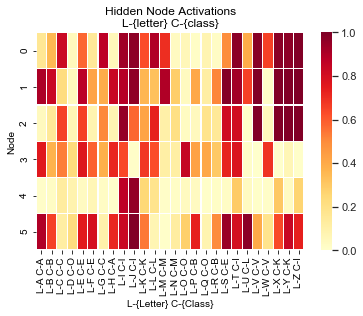

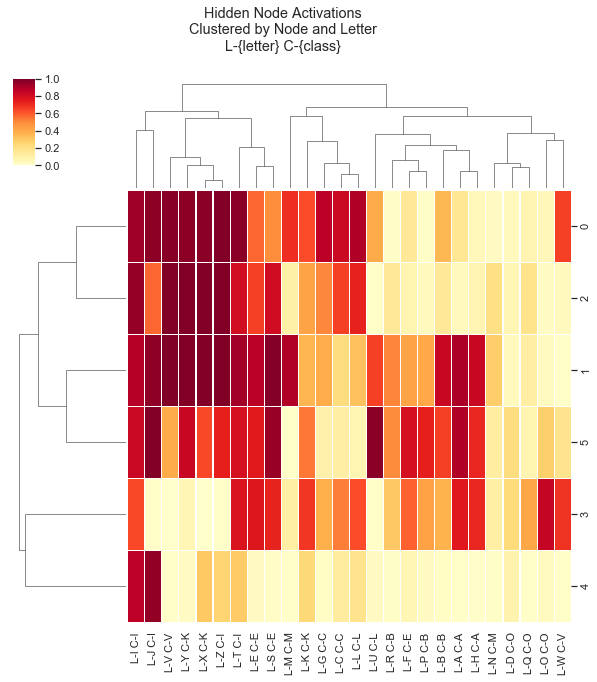

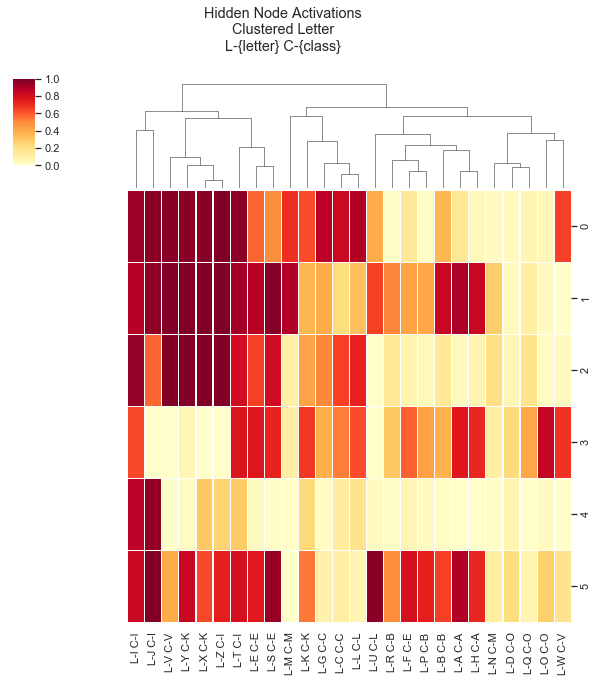

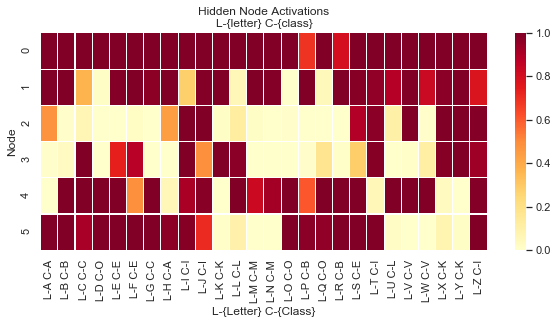

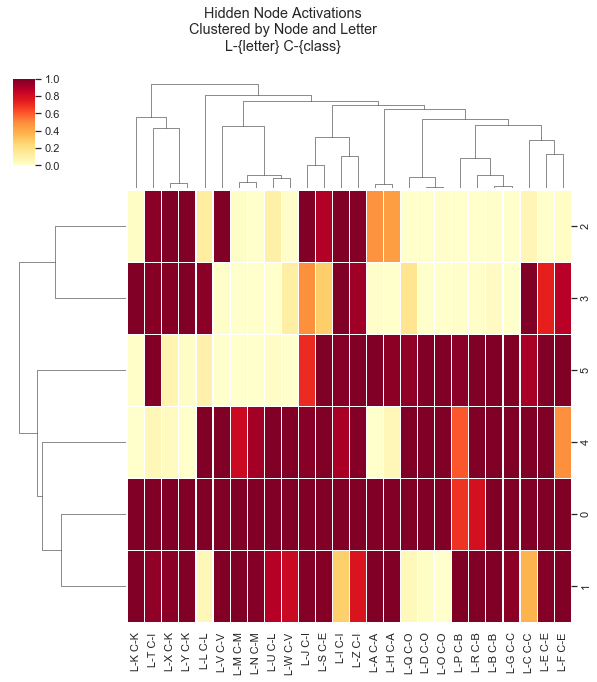

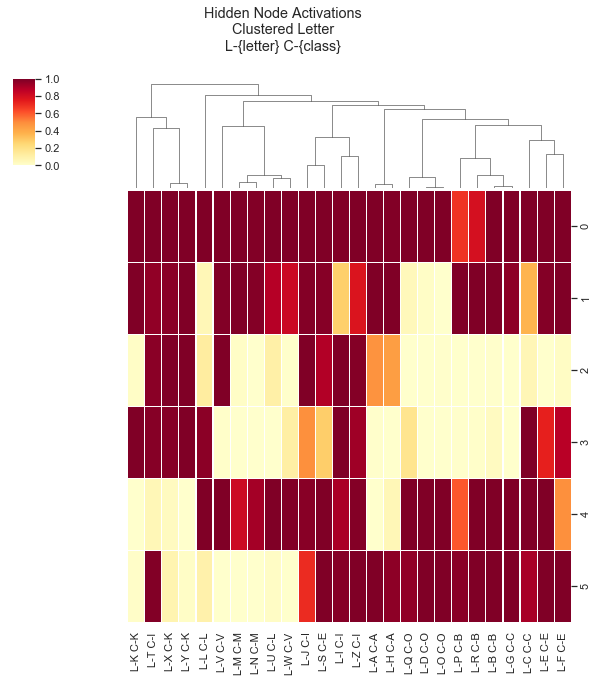

In [ ]:
def main():

# Define the global variables        
    global inputArrayLength
    global hiddenArrayLength
    global outputArrayLength
    global gridWidth
    global gridHeight
    global eGH # expandedGridHeight, defined in function expandLetterBoundaries 
    global eGW # expandedGridWidth defined in function expandLetterBoundaries 
    global mask1    
    
    # control for introduction of noise
    initialNoise  = 0.00 # noise introduced with first look at letters
    trainingNoise = 0.10 # noise introduced during training
    testingNoise  = 0.10 # noise introduced during testing

    # we will be storing our weights to the 'datafiles' folder, so if it doesn't exist, create it 
    import pathlib
    pathlib.Path('datafiles').mkdir(parents=True, exist_ok=True) 

    # put output to a date/time stamped file
    from datetime import datetime
    writeLogToFile = True

    if (writeLogToFile == True):
        logfileBaseName = 'module4_9X9_output_noise_' + str(initialNoise) + '_' + str(trainingNoise) + '_' + str(testingNoise)
        logfileDateTimeStamp = datetime.now().strftime('%Y%m%d%H%M%S.txt')
        print('Output is being written to file',os.getcwd() + '\\' + logfileBaseName + '_' + logfileDateTimeStamp)
        file = open(logfileBaseName + '_' + logfileDateTimeStamp, 'a')
        sys.stdout = file


    arraySizeList = list() # empty list

# Obtain the actual sizes for each layer of the network       
    arraySizeList = obtainNeuralNetworkSizeSpecs ()
      
    inputArrayLength = arraySizeList [0] 
    hiddenArrayLength = arraySizeList [1] 
    outputArrayLength = arraySizeList [2] 
    
    print()
    print(" inputArrayLength = ", inputArrayLength)
    print(" hiddenArrayLength = ", hiddenArrayLength)
    print(" outputArrayLength = ", outputArrayLength)        


# Parameter definitions for backpropagation, to be replaced with user inputs
    alpha = 1.0
    eta = 0.5    
    maxNumIterations = 5000   
    epsilon = 0.01
    iteration = 0
    numTrainingDataSets = 26 

                           
# The wWeightArray is for Input-to-Hidden
# The vWeightArray is for Hidden-to-Output

    wWeightArraySizeList = (inputArrayLength, hiddenArrayLength)
    vWeightArraySizeList = (hiddenArrayLength, outputArrayLength)
    biasHiddenWeightArraySize = hiddenArrayLength
    biasOutputWeightArraySize = outputArrayLength        

# The node-to-node connection weights are stored in a 2-D array

    wWeightArray = initializeWeightArray (wWeightArraySizeList)
  
    vWeightArray = initializeWeightArray (vWeightArraySizeList)

# The bias weights are stored in a 1-D array         
    biasHiddenWeightArray = initializeBiasWeightArray (biasHiddenWeightArraySize)
    biasOutputWeightArray = initializeBiasWeightArray (biasOutputWeightArraySize) 
    
    
# Get baseline metrics of outputs, errors and SSE
    print()
    print("=====================================================================================")
    print("BEFORE TRAINING:")
    print("=====================================================================================")
    
    # noise is a parameter added to allow introduction of 'noise' into the training/testing
    # noise is a value from 0.0 to 1.0 representing a percentage (0% to 100%) of pixels to be
    #   flipped (0>-1 or 1->0) when selecting a letter
    print('Initial letters with noise of', initialNoise, '%')
    print("Percentage of noise introduced into initial data ", initialNoise)
    
    ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray, initialNoise)
    
# Obtain a single set of randomly selected training values for alpha-classification
    print("=====================================================================================")
    print("MODEL TRAINING:")
    print("=====================================================================================")
   
    while iteration < maxNumIterations:           

# Increment the iteration count
        iteration = iteration +1
    
# For any given pass, we re-initialize the training list
        trainingDataList = (0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0, 0, ' ')                                 
                                                                                          
# Randomly select one of four training sets; the inputs will be randomly assigned to 0 or 1
        dataSet = random.randint(0, numTrainingDataSets - 1)

# We return the list from the function, with values placed inside the list.
        print('Training with noise of', trainingNoise, '%')
        printTheLetter = True # print letter when selected?
        trainingDataList = obtainSelectedAlphabetTrainingValues (dataSet, printTheLetter, trainingNoise)  
                                                                                                                                                    
# Create an input array based on the input training data list
        inputDataList = []  
        inputDataArray =  np.zeros(inputArrayLength)
        
# The trainning inputs are drawn from the first element (starting count at 0) in the training data list

        thisTrainingDataList = list()                                                                            
        thisTrainingDataList = trainingDataList[1]
        for node in range(inputArrayLength): 
            trainingData = thisTrainingDataList[node]
            inputDataList.append(trainingData)
            inputDataArray[node] = trainingData
        
        
# The desired outputs are drawn from the fourth element (starting count at 0) in the training data list
#   This represents the "big shape class" which we are training towards in GB1

        desiredOutputArray = np.zeros(outputArrayLength)    # iniitalize the output array with 0's
        desiredClass = trainingDataList[4]                 # identify the desired class
        desiredOutputArray[desiredClass] = 1                # set the desired output for that class to 1

                 
# Compute a single feed-forward pass and obtain the Actual Outputs                           
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataArray, wWeightArray, biasHiddenWeightArray)
    
        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray,vWeightArray, biasOutputWeightArray)
        
# Initialize the error array
        errorArray = np.zeros(outputArrayLength) 
    
# Determine the error between actual and desired outputs        
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

# Perform Backpropagation               

# Perform first part of the backpropagation of weight changes    
        newVWeightArray = backpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray)
        newBiasOutputWeightArray = backpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray) 

# Perform first part of the backpropagation of weight changes       
        newWWeightArray = backpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)

        newBiasHiddenWeightArray = backpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)  
    
                    
# Assign new values to the weight matrices
# Assign the old hidden-to-output weight array to be the same as what was returned from the BP weight update
        vWeightArray = newVWeightArray[:]
    
        biasOutputWeightArray = newBiasOutputWeightArray[:]
    
# Assign the old input-to-hidden weight array to be the same as what was returned from the BP weight update
        wWeightArray = newWWeightArray[:]  
    
        biasHiddenWeightArray = newBiasHiddenWeightArray[:] 
    
# Compute a forward pass, test the new SSE                                                                                
                                                                                                                                    
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, inputDataList, wWeightArray, biasHiddenWeightArray)

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, hiddenArray, vWeightArray, biasOutputWeightArray)
    

    
# Determine the error between actual and desired outputs

        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

        if newSSE < epsilon:            
            break
    print("Out of while loop at iteration ", iteration) 
    
# After training, get a new comparative set of outputs, errors, and SSE 
    print()
    print("=====================================================================================")
    print("AFTER TRAINING:")                  
    print("=====================================================================================")
    
    # if we want to introduce 'noise' into the data, change the value of noise to a 
    #    number greater than 0.0 and less than 1.0. This will be the percentage of pixels
    #    changed       
    print('Testing with noise of', trainingNoise, '%')
    print("Percentage of noise introduced into test data ", testingNoise)
    
    ComputeOutputsAcrossAllTrainingData (alpha, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray, testingNoise) 

# After computing final SSEs, etc., store all the weights to files (four different files)
    
# Create lists of the connection weights; one for the input-to-hidden, another for the hidden-to-output
    wWeightList = list()
    numUpperNodes = hiddenArrayLength 
    numLowerNodes = inputArrayLength
    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        # For an input-to-hidden weight matrix, the rows correspond to the number of hidden nodes
        #    and the columns correspond to the number of input nodes.
        #    This creates an HxI matrix, which can be multiplied by the input matrix (expressed as a column)
        # Similarly, for a hidden-to-output matrix, the rows correspond to the number of output nodes.
        for col in range(numLowerNodes):  # number of columns in matrix 2
            localWeight = wWeightArray[row,col] 
            wWeightList.append(localWeight)    


# Write the input-to-hidden connection weights to a file

    wWeightFile = open('datafiles/GB1wWeightFile', 'w') 

    for item in wWeightList:
        wWeightFile.write("%s\n" % item)  
    wWeightFile.close()
     
# do the same for the hidden to output weights
 
    vWeightList = list()
    numUpperNodes = outputArrayLength
    numLowerNodes = hiddenArrayLength
    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        # For an input-to-hidden weight matrix, the rows correspond to the number of hidden nodes
        #    and the columns correspond to the number of input nodes.
        #    This creates an HxI matrix, which can be multiplied by the input matrix (expressed as a column)
        # Similarly, for a hidden-to-output matrix, the rows correspond to the number of output nodes.
        for col in range(numLowerNodes):  # number of columns in matrix 2
            localWeight = vWeightArray[row,col] 
            vWeightList.append(localWeight)    


# Write the hidden-to-output connection weights to a file

    vWeightFile = open('datafiles/GB1vWeightFile', 'w') 

    for item in vWeightList:
        vWeightFile.write("%s\n" % item)  
 
    vWeightFile.close() 

# Do the same thing for the two sets of bias weights    
        
# Start with the hidden node bias weights
    
# Create a list storing the array values for the hidden node bias weights
    wBiasWeightList = list()
    for node in range(hiddenArrayLength):  #  Number of hidden bias nodes
        localBiasWeight = biasHiddenWeightArray[node] 
        wBiasWeightList.append(localBiasWeight)                
                
# Write the hidden node bias weights to a file

    wBiasWeightFile = open('datafiles/GB1wBiasWeightFile', 'w') 

    for item in wBiasWeightList:
        wBiasWeightFile.write("%s\n" % item)  
    wBiasWeightFile.close()                            
                                        

# Repeat the process with the output node bias weights
    
# Create a list storing the array values for the output node bias weights
    vBiasWeightList = list()  
    for node in range(outputArrayLength):  #  Number of output nodes
        localBiasWeight = biasOutputWeightArray[node] 
        vBiasWeightList.append(localBiasWeight)                                                      
                                                                          
# Write the output node bias weights to a file

    vBiasWeightFile = open('datafiles/GB1vBiasWeightFile', 'w') 

    for item in vBiasWeightList:
        vBiasWeightFile.write("%s\n" % item)  
    vBiasWeightFile.close()  
                        
    print(" Completed training and storing connection weights to files")

#    print ' for the last training data set:'
#    printLetter(trainingDataList)
    
    if (writeLogToFile):
        file.close()                                      

# Conclude specification of the MAIN procedure    
if __name__ == "__main__": main()
